# Predicting Car Prices Using K-Nearest Neighbors

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. In this project I will solve a regression problem, car price. I will also investigate the effect of varying parameters on the accuracy of a k-nearest neighbors prediction. First I'll independently vary the quality of features and number of nearest neighbors. Then I'll vary the number and quality of features and hyperparameters (number of nearest neighbors) in combination. Let's get started.

In [1]:
# Import nescessary libraries
import pandas as pd
pd.options.display.max_columns = 9
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use("fivethirtyeight")

## Data Overview
The data set I will be working with contains information on various cars. For each car I have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [2]:
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


I'll isolate the numeric columns relevant for the learning process in `numeric_cars`

In [3]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [4]:
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning
Now I'll clean the data and replace or drop missing values.

In [5]:
# Replace non-numeric characters with NaN
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
#Standardize data types and count null values
numeric_cars = numeric_cars.astype(float)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column I want to predict, I'll remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

 I'll look at the distribution of values across all columns

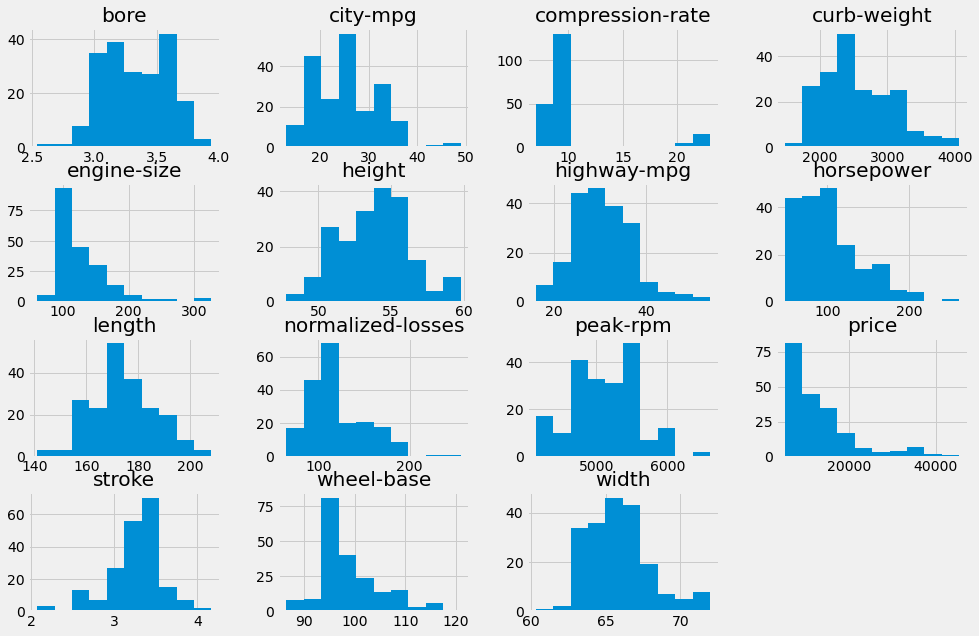

In [10]:
numeric_cars.hist(figsize=(15,10));

Next I'll normalize the columns so that they range between 0 and 1. This ensures that I can compare values across columns.

In [11]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate Model

Now I'll define a function that encapsulates the training and simple validation process. It uses a single column as its feature and the dataset is split evenly into test and train. To ensure that the training isn't biased toward the order of the data, I'll randomize the rows. I'll use the default nearest neighbor value, 5.

In [12]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index=np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

Now I'll apply the function to all feature columns, one at a time.

In [13]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')   

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

The above table shows the features ranked in order of lowest to highest root mean square error (RMSE) values. The RMSE is an error metric that quantifies how inaccurate the predictions are from the actual values. In this case, the error metric shows how off the predicted price values are from the actual price values for the cars in the test dataset. From the output, `engine-size` has the lowest RMSE value of 3238.46, and would therefore be the best candidate for a univariate fit model.

### Univariate Hyperparameter Tuning
Now that I varied the features used in the model, I will vary the hyperparameter, k, or the nearest neighbor value. Varying hyperparameters affects the behavior of the model independently of the actual data that's used when making predictions. A simple but common hyperparameter optimization technique is known as grid search, which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error. While grid search can take a long time when working with large datasets, the data I'm working with in this notebook is small and this process is relatively quick. To do this I'll first modify the `knn_train_test()` function above to accept a parameter for the k value.

In [14]:
def knn_train_test(k_values, train_col, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index=np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # Make predictions using model.
        predictions = knn.predict(test_df[[train_col]])
    
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        #Store rmse
        k_rmses[k] = rmse
        
    return k_rmses

Now I'll run the `knn_train_test()` function on each feature with k values of 1, 3, 5, 7, and 9 to see which results in the lowest RMSE value. I'll then plot the RMSE vs k value for each feature, and take the average RMSE for all k values for each feature. 

In [15]:
# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
k_values = [1,3,5,7,9]
k_rmse_results = {}
for col in train_cols:
    rmse_val = knn_train_test(k_values, col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


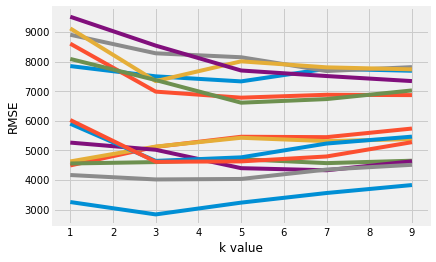

In [16]:
#plot the above results
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [17]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Again, the `engine-size` feature has the lowest average and lowest overall RMSE value. Varying the k values shows that the lowest RMSE value for `engine-size` decreases until k=3, and then increase as k increase. 

## Multivariate Model
Now I'll check if adding more features, creating an multivariate model, lowers the root mean squared error. I'll take the best 2 to 6 features at a time from the averages above, and observe their effects on the RMSE. First I'll have to update the `knn_train_test` function to accept multiple columns. I'll fix the neighbor parameter to 5 so I can focus on how the number of features affects the fit.

In [18]:
def knn_train_test(k_values, train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        # Updated to accempt multiple columns
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [19]:
k_values = [5]
k_rmse_results = {}
for nr_best_feats in range(2,7):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        k_values,
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

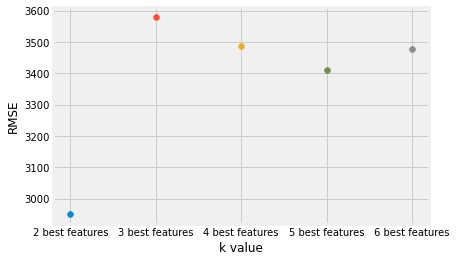

In [20]:
for k,v in k_rmse_results.items():
    x = k
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

From the above outputs, the RMSE is lowest using only the best two features, `engine-size` and `horsepower`. The RMSE is considerably higher when using more than the best two features. The RMSE is 2949.88 using both features, which is lower than using just `engine-size` (3346.48) or just `horsepower` (4219.38).

### Multivariate Hyperparameter Tuning
Finally, I'll vary the hyperparameter (k) for each n best features output above to determine the best k value.
Below I'll set the k value from 1 to 25 and then plot the results.


In [21]:
k_values = [i for i in range(1, 25)]
k_rmse_results = {}
for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        k_values,
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

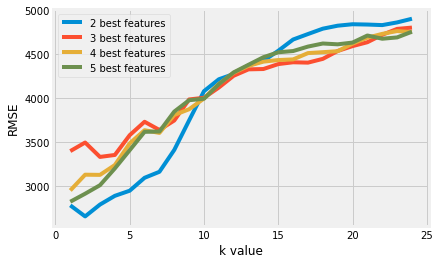

In [22]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()

It is interesting to observe that the optimal k value is below 5 for all the models, and that the default k value in scikit-learn's `KNeighborsRegressor` [function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) is 5. 

By varying the features and hyperperameters used to build the model I was able to identify the combination that results it the best fit, or lowest RMSE. Using just two features `engine-size` and `horsepower` with k=2 yielded the lowest RMSE of 2657.8.

There is definite room for improvement, next steps for this project include repeating the process using k-fold cross validation instead of test/train validation. K-fold cross validation takes advantage of a larger proportion of the data during training while still rotating through different subsets of the data to avoid the biases of train/test validation. Below are the steps.

1. split the full dataset into `k` equal length partitions.
2. select `k-1` partitions as the training set and
3. select the remaining partition as the test set
4. train the model on the training set.
5. use the trained model to predict labels on the test fold.
6. compute the test fold's error metric.
7. repeat all of the above steps `k-1` times, until each partition has been used as the test set for an iteration.
8. calculate the mean of the `k` error values.